In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [126]:
df_stocks = pd.read_csv('data/stocks.csv')
df_tweets = pd.read_csv('data/TrumpTweets.csv')
df_approval_ratign = pd.read_csv('data/TrumpApproval.csv')

In [66]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2018-12-31 to 2017-01-01
Data columns (total 2 columns):
count                    716 non-null int64
avg_favorites_per_day    716 non-null float64
dtypes: float64(1), int64(1)
memory usage: 16.8+ KB


In [3]:
df_approval_ratign.head()

,Unnamed: 0,approve_estimate,disapprove_estimate,timestamp
0,0,42.81609,53.54470,2019-09-11
1,3,42.54695,53.41855,2019-09-10
2,8,42.62912,53.25327,2019-09-09
3,9,42.59635,53.27431,2019-09-08
4,12,42.64939,53.15034,2019-09-07


In [4]:
df_tweets.max(axis=0)

date                     2018-12-31
count                            35
avg_favorites_per_day        320104
dtype: object

In [5]:
df_stocks['1. open'] = df_stocks['1. open'].astype(float)
df_stocks['2. high'] = df_stocks['2. high'].astype(float)
df_stocks['3. low'] = df_stocks['3. low'].astype(float)
df_stocks['4. close'] = df_stocks['4. close'].astype(float)
df_stocks['5. adjusted close'] = df_stocks['5. adjusted close'].astype(float)
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 6 columns):
Unnamed: 0           502 non-null object
1. open              502 non-null float64
2. high              502 non-null float64
3. low               502 non-null float64
4. close             502 non-null float64
5. adjusted close    502 non-null float64
dtypes: float64(5), object(1)
memory usage: 23.7+ KB


In [6]:
df_stocks['delta']=((df_stocks['5. adjusted close']-df_stocks['1. open'])/df_stocks['1. open'])*100

In [7]:
mean_tweets = df_tweets['count'].mean()
a = df_tweets[df_tweets['count']<8]
b = df_tweets[df_tweets['count']>=8]


In [8]:
c = df_stocks[df_stocks.index.isin(a.index)]
d = df_stocks[df_stocks.index.isin(b.index)]
stats.ttest_ind(c['delta'],d['delta'], equal_var = False)

Ttest_indResult(statistic=1.9539281252547294, pvalue=0.051355550748795414)

In [9]:
c.mean()

1. open              239.830572
2. high              240.732292
3. low               238.742447
4. close             239.771110
5. adjusted close    232.604772
delta                 -3.079006
dtype: float64

In [10]:
print(c['delta'].mean())
print(d['delta'].mean())

-3.079005661914955
-3.296654588132704


In [11]:
df_tweets['count'].corr(df_stocks['delta'])

-0.11621111670259013

In [12]:
df_tweets['count'].corr(df_approval_ratign['approve_estimate'])

-0.26308377055632265

In [13]:
import matplotlib.pyplot as plt
import numpy as np

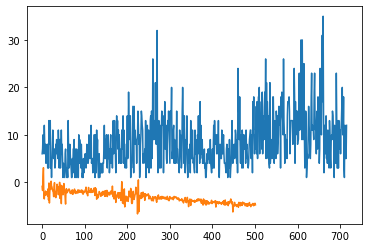

In [14]:
plt.plot(df_tweets['count'])
plt.plot(df_stocks['delta'])
plt.show()


In [71]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2018-12-31 to 2017-01-01
Data columns (total 2 columns):
count                    716 non-null int64
avg_favorites_per_day    716 non-null float64
dtypes: float64(1), int64(1)
memory usage: 16.8+ KB


In [77]:
df_stocks['Unnamed: 0'] = pd.to_datetime(df_stocks['Unnamed: 0'])

In [84]:
df_stocks.set_index('Unnamed: 0',inplace=True)

In [82]:
df_tweets.index

Index(['2018-12-31', '2018-12-30', '2018-12-29', '2018-12-28', '2018-12-27',
       '2018-12-26', '2018-12-25', '2018-12-24', '2018-12-23', '2018-12-22',
       ...
       '2017-01-10', '2017-01-09', '2017-01-08', '2017-01-07', '2017-01-06',
       '2017-01-05', '2017-01-04', '2017-01-03', '2017-01-02', '2017-01-01'],
      dtype='object', name='date', length=716)

In [85]:
temp_df = pd.merge(df_stocks,df_tweets,left_index=True,right_index=True)

In [90]:
# df_approval_ratign.set_index('timestamp',inplace=True)

In [128]:
len(df_approval_ratign.drop_duplicates())

962

In [130]:
df_approval_ratign.head()

,Unnamed: 0,approve_estimate,disapprove_estimate,timestamp
0,0,42.81609,53.54470,2019-09-11
1,3,42.54695,53.41855,2019-09-10
2,8,42.62912,53.25327,2019-09-09
3,9,42.59635,53.27431,2019-09-08
4,12,42.64939,53.15034,2019-09-07


In [131]:
df = temp_df.join(df_approval_ratign.set_index('timestamp'), how='left')

In [136]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [145]:
df.dropna(inplace=True)

In [146]:
df.shape

(530, 10)

In [151]:
df.to_csv('final.csv')